<a href="https://colab.research.google.com/github/mak1983/DataAnalyst/blob/main/bank_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('/content/Bank Customer Churn Prediction.csv', delimiter=',')

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df.shape

(10000, 14)

In [13]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [14]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [17]:
df["Exited"].value_counts()


,count
Exited,
0,7963
1,2037


In [18]:
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
sizes

[np.int64(2037), np.int64(7963)]

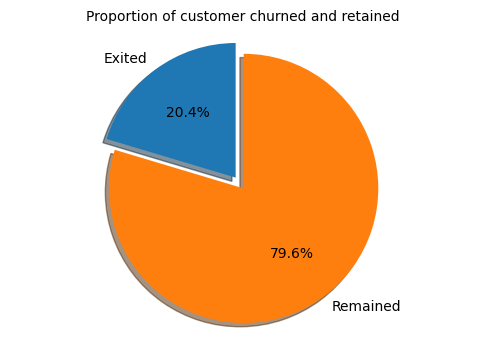

In [19]:
labels = 'Exited', 'Remained'
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%0.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 10,)
plt.show()



<Axes: xlabel='IsActiveMember', ylabel='count'>

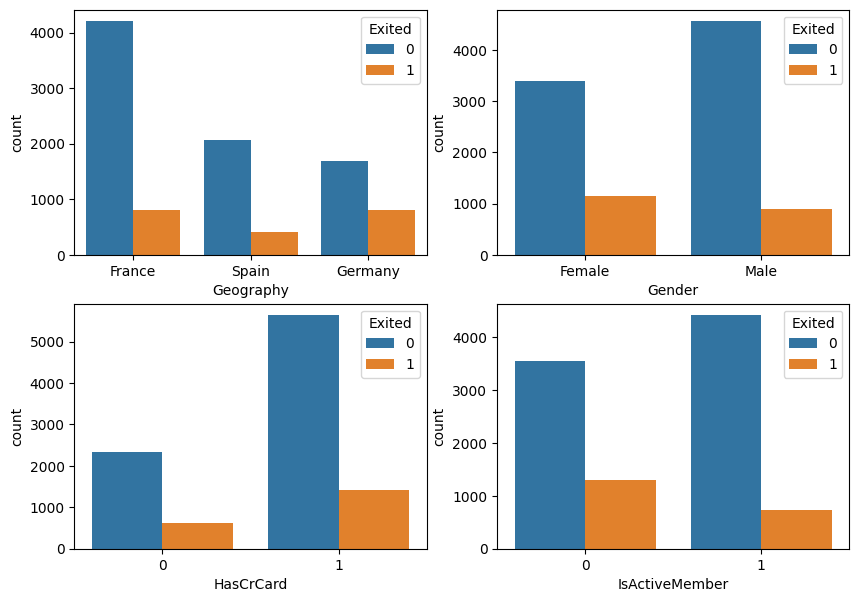

In [20]:
  # We first review the 'Status' relation with categorical variables
  fig, axarr = plt.subplots(2, 2, figsize=(10, 7))
  sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
  sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
  sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
  sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

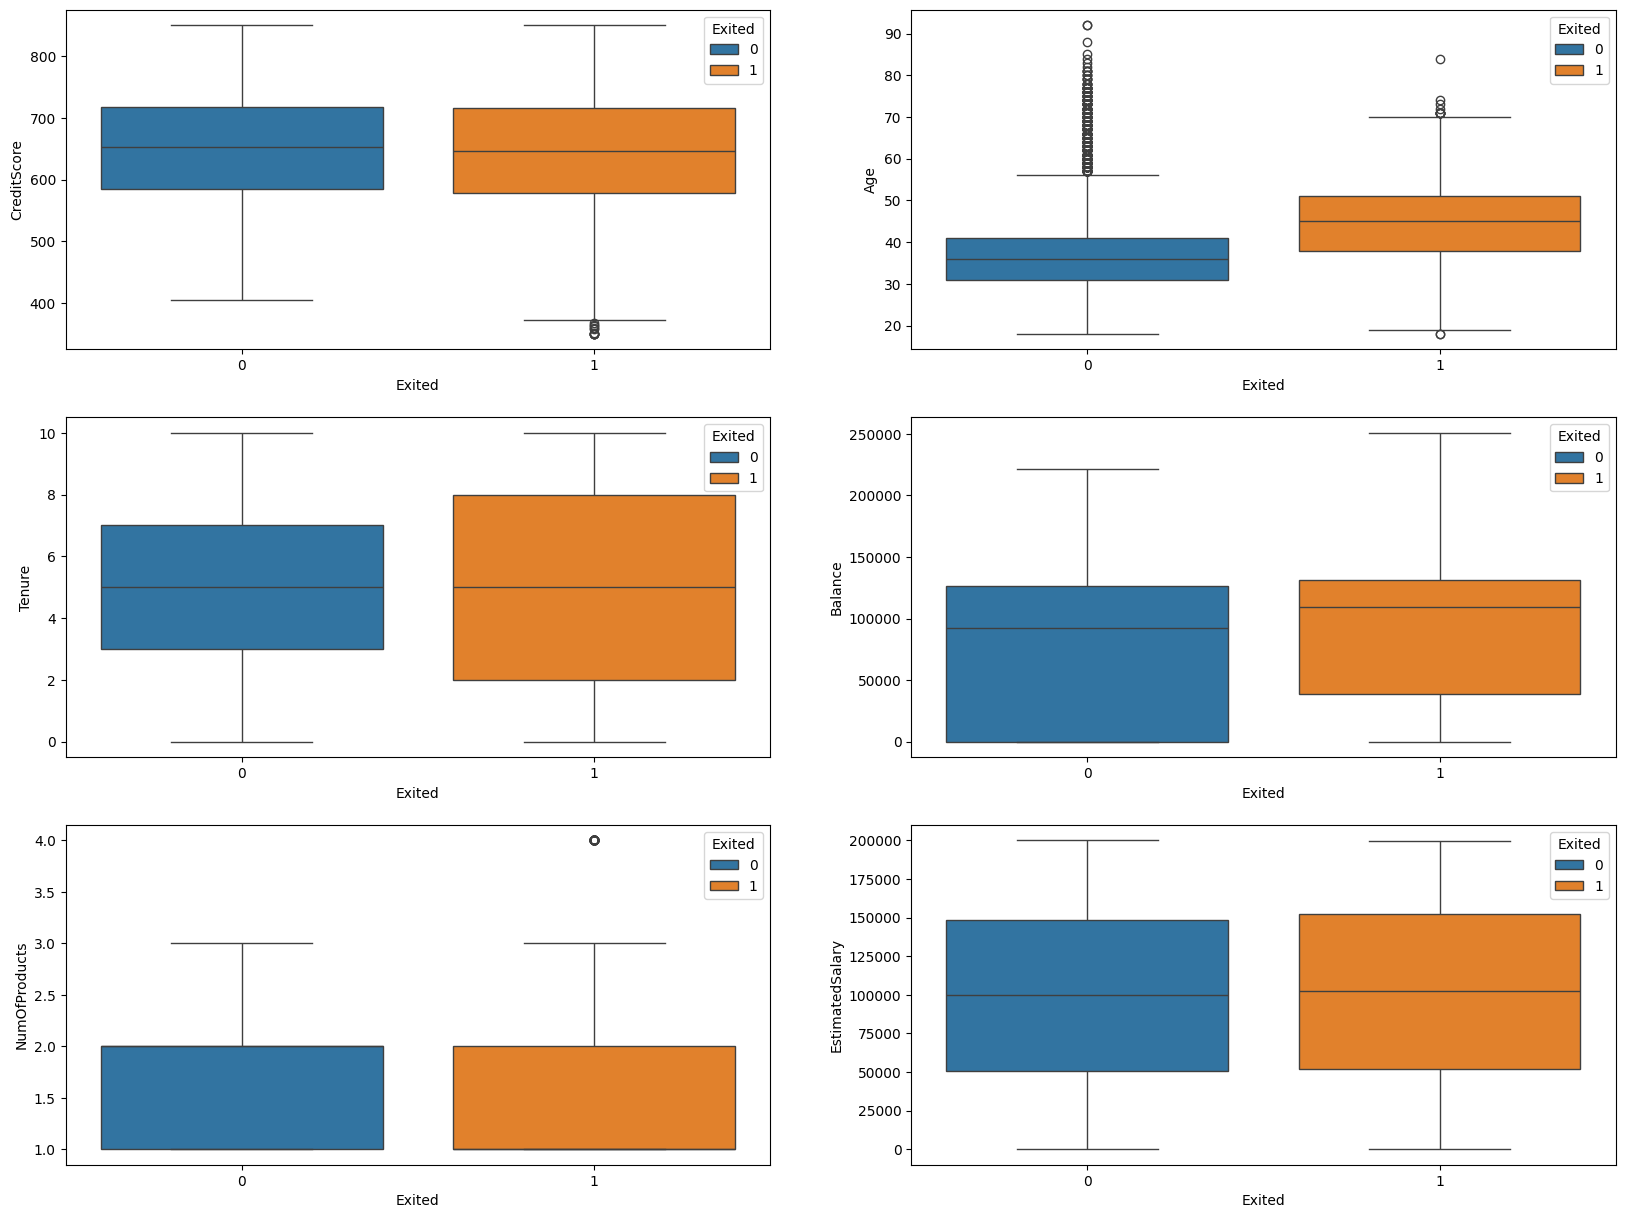

In [21]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 15))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

In [22]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [23]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [24]:
dataset = pd.get_dummies(data=df,dtype=int, drop_first=True)

In [25]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0



Correlation matrix and heatmap

In [26]:
dataset_2 = dataset.drop(columns='Exited')

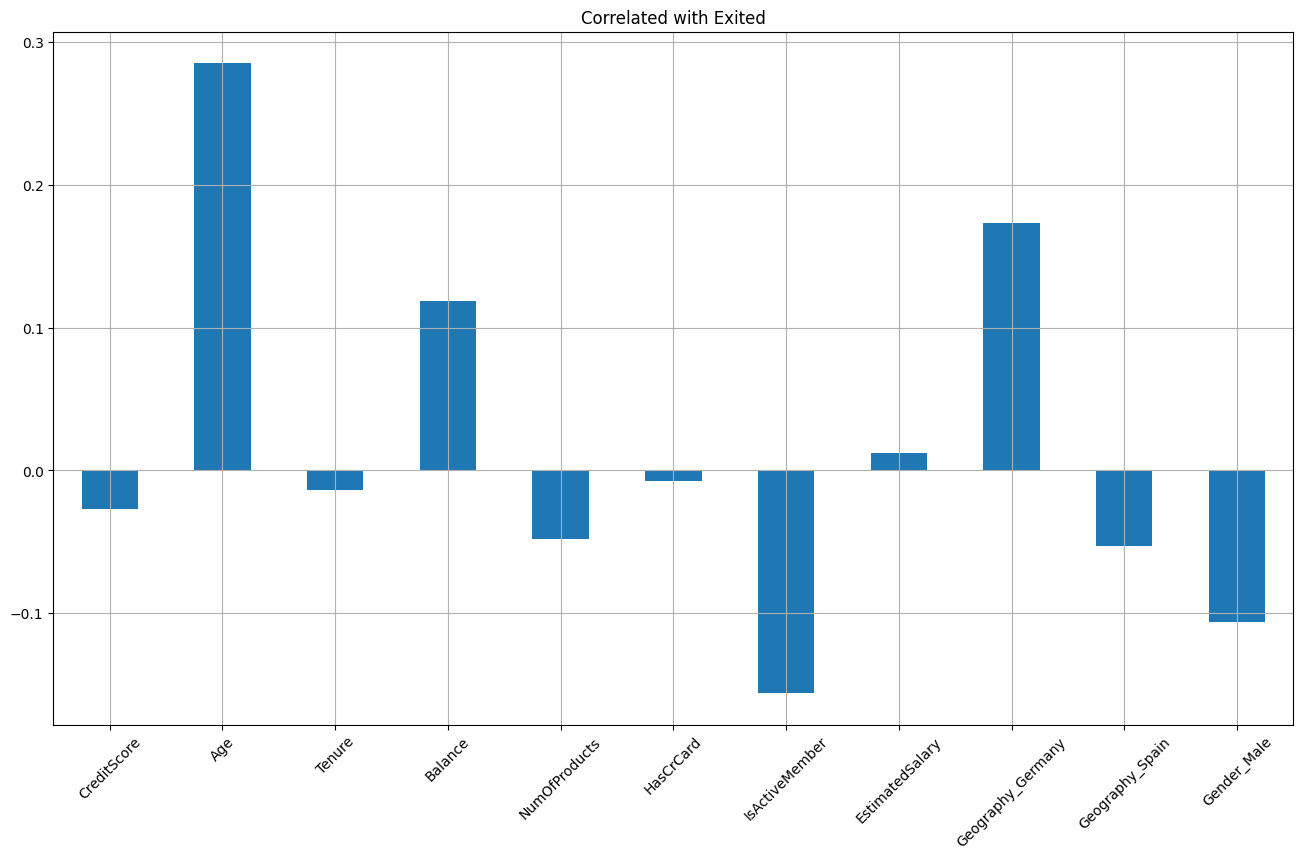

In [27]:
dataset_2.corrwith(dataset['Exited']).plot.bar(figsize=(16,9), title='Correlated with Exited', rot=45, grid=True);

In [28]:
corr = dataset.corr()

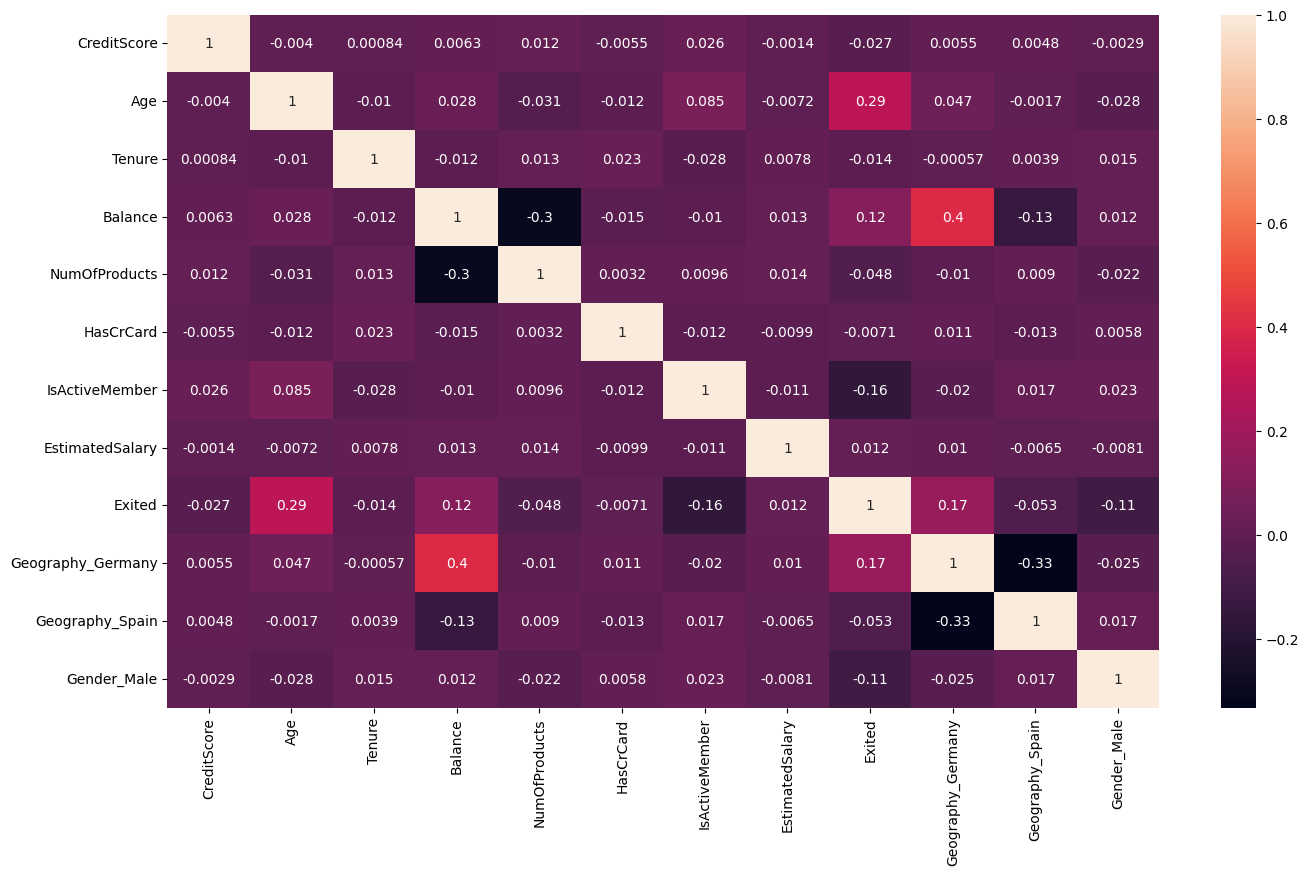

In [29]:
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True);

In [30]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [31]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['Exited'],axis=1)
y = dataset['Exited']
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
X_train.shape,X_test.shape

((8000, 11), (2000, 11))

In [33]:
y_train.shape, y_test.shape

((8000,), (2000,))

Feture Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [35]:
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [36]:
x_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

**1.Logistic Regression**

In [37]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [38]:
y_pred = classifier_lr.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [40]:
results = pd.DataFrame([['Logistic regression', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1', 'precision', 'Recall'])

In [41]:
results

,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.811,0.294776,0.552448,0.201018


In [42]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1543   64]
 [ 314   79]]


In [43]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_lr, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 80.89 %
Standard Deviation is 1.09 %


# Support Vector Machine (SVM)

In [44]:
from sklearn.svm import SVC

In [45]:
svc_model = SVC(kernel='linear')


In [46]:
svc_model.fit(x_train, y_train)

SVC(kernel='linear')

In [47]:
 y_pred = svc_model.predict(x_test)
print( y_pred)

[0 0 0 ... 0 0 0]


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score


In [49]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)


In [50]:
model_results = pd.DataFrame([['Support Vector Machine(SVM)', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1', 'precision', 'Recall'])

In [51]:
model_results

,Model,Accuracy,F1,precision,Recall
0,Support Vector Machine(SVM),0.8035,0.0,0.0,0.0


In [52]:
results = pd.concat([results, model_results], ignore_index=True)

In [53]:
results

,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.8110,0.294776,0.552448,0.201018
1,Support Vector Machine(SVM),0.8035,0.000000,0.000000,0.000000


In [54]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1607    0]
 [ 393    0]]


In [55]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=svc_model, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 79.45 %
Standard Deviation is 0.06 %


#XGBoost

In [56]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
y_pred = classifier_xgb.predict(x_test)

In [58]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [59]:
xgbmodel_results = pd.DataFrame([['XGBoost classifier', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1', 'precision', 'Recall'])



In [60]:
results = pd.concat([results,xgbmodel_results], ignore_index=True)


In [61]:
results

,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.8110,0.294776,0.552448,0.201018
1,Support Vector Machine(SVM),0.8035,0.000000,0.000000,0.000000
2,XGBoost classifier,0.8640,0.597633,0.713781,0.513995


In [62]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   81]
 [ 191  202]]


In [63]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_xgb, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 85.26 %
Standard Deviation is 0.72 %


# Predicting a single observation


In [70]:
single_obs = [[510,	62,	5,	12500.01,	1,	0,	1,	102030.10, 0,	0, 1]]


In [71]:
classifier_xgb.predict(sc.transform(single_obs))

array([0])

so, as signle observation provided (0= Remain and 1= Exited) the answer given by the Machine Learning Model, that The Customer is Remain With the Bank Service.